# Opnames per leeftijds plot

Deze data is vrij schaars, qua updates en qua details. Dus roeien met de riemen die we hebben.

## Python voorbereiden

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date,datetime,timedelta
import matplotlib.pyplot as plt

In [92]:
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 3, "font.size":10,"axes.titlesize":24,"axes.labelsize":18})
sns.set_palette(sns.color_palette(['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', \
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD', \
                    '#000000']))



def tuftefy(ax):
    """Remove spines and tick position markers to reduce ink."""
    # 
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["bottom"].set_color('grey')

    ax.grid(color="w", alpha=0.5)
    ax.get_yaxis().grid(True)
    ax.get_xaxis().grid(False)

def fancy_titles(t1, t2, ax=None):
  if ax:
    ax.set_title(t1, loc='left', fontsize=18)
    ax.set_title(t2, loc='right', fontsize=13, color='grey')
  else:
    plt.title(t1, loc='left', fontsize=18)
    plt.title(t2, loc='right', fontsize=13, color='grey')



# Date importeren en verwerken

In [93]:

opnames = pd.read_csv('https://data.rivm.nl/covid-19/COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep.csv', sep=';', parse_dates=["Date_of_statistics_week_start"])
opnames

,Version,Date_of_report,Date_of_statistics_week_start,Age_group,Hospital_admission_notification,Hospital_admission,IC_admission_notification,IC_admission
0,1,2022-02-02 00:30:00,2020-02-24,0-14,0,0.0,0,0.0
1,1,2022-02-02 00:30:00,2020-02-24,15-19,0,0.0,0,0.0
2,1,2022-02-02 00:30:00,2020-02-24,20-24,0,0.0,0,0.0
3,1,2022-02-02 00:30:00,2020-02-24,25-29,0,0.0,0,0.0
4,1,2022-02-02 00:30:00,2020-02-24,30-34,0,1.0,0,0.0
...,...,...,...,...,...,...,...,...
1831,1,2022-02-02 00:30:00,2022-01-31,75-79,29,NaN,0,NaN
1832,1,2022-02-02 00:30:00,2022-01-31,80-84,34,NaN,1,NaN
1833,1,2022-02-02 00:30:00,2022-01-31,85-89,25,NaN,0,NaN
1834,1,2022-02-02 00:30:00,2022-01-31,90+,16,NaN,0,NaN


In [94]:
opnames2 = opnames.sort_values(by=["Age_group", "Date_of_statistics_week_start"])
#.rolling(window=7).mean().reset_index()
opnames2['Hospital_admission_notification_7d'] = opnames2.Hospital_admission_notification.rolling(window=5).mean()
opnames2 = opnames2[opnames2.Date_of_statistics_week_start > '2020-05-01']
opnames2


,Version,Date_of_report,Date_of_statistics_week_start,Age_group,Hospital_admission_notification,Hospital_admission,IC_admission_notification,IC_admission,Hospital_admission_notification_7d
180,1,2022-02-02 00:30:00,2020-05-04,0-14,3,2.0,0,0.0,3.8
198,1,2022-02-02 00:30:00,2020-05-11,0-14,2,2.0,0,0.0,3.2
216,1,2022-02-02 00:30:00,2020-05-18,0-14,3,3.0,0,0.0,2.6
234,1,2022-02-02 00:30:00,2020-05-25,0-14,1,0.0,0,0.0,2.0
252,1,2022-02-02 00:30:00,2020-06-01,0-14,0,0.0,0,0.0,1.8
...,...,...,...,...,...,...,...,...,...
1763,1,2022-02-02 00:30:00,2022-01-03,Unknown,0,0.0,0,0.0,0.0
1781,1,2022-02-02 00:30:00,2022-01-10,Unknown,0,0.0,0,0.0,0.0
1799,1,2022-02-02 00:30:00,2022-01-17,Unknown,0,0.0,0,0.0,0.0
1817,1,2022-02-02 00:30:00,2022-01-24,Unknown,0,0.0,0,0.0,0.0


In [95]:
opnames_nice = pd.read_csv("https://github.com/mzelst/covid-19/raw/master/data-nice/age/leeftijdsverdeling_datum_Klinisch_IC_long.csv", parse_dates=["Datum"])
opnames_nice = opnames_nice[opnames_nice.Type == "Klinisch"].sort_values("Datum")
opnames_nice.drop(columns=['Type'], inplace=True)

old_date = opnames_nice.Datum
opnames_nice7 = opnames_nice.diff().rolling(window=14).mean()
opnames_nice7['Datum'] = old_date
opnames_nice7

old_date = opnames_nice.Datum
opnames_nice = opnames_nice.diff().rolling(window=35).mean()
opnames_nice['Datum'] = old_date
opnames_nice

,<20,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,>90,Datum
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-03
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-05
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,12.314286,3.542857,5.371429,6.257143,5.600000,4.857143,4.514286,7.114286,9.285714,10.257143,9.514286,11.942857,14.485714,11.685714,8.200000,4.457143,2022-01-31
1092,13.000000,3.657143,5.857143,6.600000,5.771429,5.000000,4.685714,7.114286,9.200000,10.228571,9.371429,11.685714,13.971429,12.085714,8.657143,4.342857,2022-02-01
1094,14.028571,3.714286,6.114286,7.257143,6.314286,5.057143,4.971429,7.228571,9.228571,10.457143,9.228571,12.200000,14.600000,12.685714,8.942857,4.314286,2022-02-02
1096,14.057143,3.714286,6.142857,7.285714,6.342857,5.114286,5.057143,7.000000,8.914286,10.200000,9.142857,12.257143,13.942857,12.542857,9.228571,4.200000,2022-02-03


In [96]:
groups = pd.DataFrame(np.array([
    ["0-14", "0-14"], 
    ["15-29", "15-19"],
    ["15-29", "20-24"],
    ["15-29", "25-29"],
    ["30-44", "30-34"],
    ["30-44", "35-39"],
    ["30-44", "40-44"],
    ["45-59", "45-49"],
    ["45-59", "50-54"],
    ["45-59", "55-49"],
    ["60-74", "60-64"],
    ["60-74", "65-69"],
    ["60-74", "70-74"],
    ["75+", "75-79"],
    ["75+", "80-84"],
    ["75+", "85-89"],
    ["75+", "90+"],
    ["Onbekend", "Unknown"]
]), columns=["Group", "Age_group"])
merged_opnames = opnames2.set_index('Age_group').join(groups.set_index('Age_group')).reset_index()
merged_opnames = merged_opnames.groupby(by=['Date_of_statistics_week_start','Group']).sum().reset_index()
merged_opnames

,Date_of_statistics_week_start,Group,Version,Hospital_admission_notification,Hospital_admission,IC_admission_notification,IC_admission,Hospital_admission_notification_7d
0,2020-05-04,0-14,1,3,2.0,0,0.0,3.8
1,2020-05-04,15-29,3,17,9.0,1,2.0,20.8
2,2020-05-04,30-44,3,36,20.0,5,4.0,55.6
3,2020-05-04,45-59,2,104,45.0,12,11.0,136.8
4,2020-05-04,60-74,3,177,86.0,22,20.0,353.0
...,...,...,...,...,...,...,...,...
639,2022-01-31,30-44,3,51,0.0,1,0.0,114.8
640,2022-01-31,45-59,2,27,0.0,0,0.0,74.4
641,2022-01-31,60-74,3,72,0.0,1,0.0,208.2
642,2022-01-31,75+,4,104,0.0,1,0.0,238.0


In [97]:

groups = pd.DataFrame(np.array([
    ["<30", "0-14"], 
    ["<30", "15-19"],
    ["<30", "20-24"],
    ["<30", "25-29"],
    ["30+", "30-34"],
    ["30+", "35-39"],
    ["30+", "40-44"],
    ["30+", "45-49"],
    ["30+", "50-54"],
    ["30+", "55-49"],
    ["30+", "60-64"],
    ["30+", "65-69"],
    ["30+", "70-74"],
    ["30+", "75-79"],
    ["30+", "80-84"],
    ["30+", "85-89"],
    ["30+", "90+"],
    ["30+", "Unknown"]
]), columns=["Group", "Age_group"])
merged_opnames2 = opnames2.set_index('Age_group').join(groups.set_index('Age_group')).reset_index()
merged_opnames2 = merged_opnames2.groupby(by=['Date_of_statistics_week_start','Group']).sum().reset_index()
merged_opnames2

,Date_of_statistics_week_start,Group,Version,Hospital_admission_notification,Hospital_admission,IC_admission_notification,IC_admission,Hospital_admission_notification_7d
0,2020-05-04,30+,13,504,253.0,44,40.0,891.0
1,2020-05-04,<30,4,20,11.0,1,2.0,24.6
2,2020-05-11,30+,13,219,177.0,30,27.0,602.6
3,2020-05-11,<30,4,6,7.0,1,1.0,16.4
4,2020-05-18,30+,13,170,133.0,22,18.0,420.8
...,...,...,...,...,...,...,...,...
179,2022-01-17,<30,4,169,199.0,2,3.0,93.4
180,2022-01-24,30+,13,836,816.0,75,67.0,774.8
181,2022-01-24,<30,4,224,229.0,8,6.0,127.6
182,2022-01-31,30+,13,254,0.0,3,0.0,635.4


In [98]:
opnames_nice['<30'] = opnames_nice['<20'] + opnames_nice['20 - 24'] + opnames_nice['25 - 29']
opnames_nice['30 - 60'] = opnames_nice['30 - 34'] + opnames_nice['35 - 39'] + \
    opnames_nice['40 - 44'] + opnames_nice['45 - 49'] + \
    opnames_nice['50 - 54'] + opnames_nice['55 - 59']
    
opnames_nice['60+'] = opnames_nice['60 - 64'] + opnames_nice['65 - 69'] + \
    opnames_nice['70 - 74'] + opnames_nice['75 - 79'] + \
    opnames_nice['80 - 84'] + opnames_nice['85 - 89'] + \
    opnames_nice['>90']

opnames_nice['30+'] = opnames_nice['30 - 60'] + opnames_nice['60+']

opnames_nice7['<30'] = opnames_nice7['<20'] + opnames_nice7['20 - 24'] + opnames_nice7['25 - 29']
opnames_nice7['30 - 60'] = opnames_nice7['30 - 34'] + opnames_nice7['35 - 39'] + \
    opnames_nice7['40 - 44'] + opnames_nice7['45 - 49'] + \
    opnames_nice7['50 - 54'] + opnames_nice7['55 - 59']
    
opnames_nice7['60+'] = opnames_nice7['60 - 64'] + opnames_nice7['65 - 69'] + \
    opnames_nice7['70 - 74'] + opnames_nice7['75 - 79'] + \
    opnames_nice7['80 - 84'] + opnames_nice7['85 - 89'] + \
    opnames_nice7['>90']

opnames_nice7['30+'] = opnames_nice7['30 - 60'] + opnames_nice7['60+']

opnames_nice7['0-9'] = opnames_nice7['<20']
opnames_nice7['10-19'] = opnames_nice7['<20']
opnames_nice7['20-29'] = opnames_nice7['20 - 24'] + opnames_nice7['25 - 29']
opnames_nice7['30-39'] = opnames_nice7['30 - 34'] + opnames_nice7['35 - 39']
opnames_nice7['40-49'] = opnames_nice7['40 - 44'] + opnames_nice7['45 - 49']
opnames_nice7['50-59'] = opnames_nice7['50 - 54'] + opnames_nice7['55 - 59']
opnames_nice7['60-69'] = opnames_nice7['60 - 64'] + opnames_nice7['65 - 69']
opnames_nice7['70-79'] = opnames_nice7['70 - 74'] + opnames_nice7['75 - 79']
opnames_nice7['80-89'] = opnames_nice7['80 - 84'] + opnames_nice7['85 - 89']
opnames_nice7['90+'] = opnames_nice7['>90']

opnames_nice7


,<20,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,...,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,20.142857,4.857143,7.428571,9.071429,7.571429,5.857143,4.928571,7.500000,9.714286,9.714286,...,20.142857,20.142857,12.285714,16.642857,10.785714,17.214286,18.714286,26.285714,21.500000,4.928571
1092,22.214286,4.857143,8.214286,9.500000,8.071429,6.285714,5.285714,8.071429,10.142857,10.357143,...,22.214286,22.214286,13.071429,17.571429,11.571429,18.214286,20.000000,26.928571,24.357143,4.928571
1094,23.785714,5.357143,8.785714,11.000000,9.214286,6.214286,6.000000,8.571429,10.500000,10.857143,...,23.785714,23.785714,14.142857,20.214286,12.214286,19.071429,21.642857,30.642857,28.214286,5.285714
1096,24.214286,5.142857,8.000000,11.000000,9.571429,6.357143,6.500000,8.357143,10.071429,11.285714,...,24.214286,24.214286,13.142857,20.571429,12.857143,18.428571,22.071429,30.928571,28.571429,5.071429


In [99]:

ageGroupStats = pd.read_csv( "data/rivm-cases-per-ggd-per-age-group.csv", parse_dates=["Date"])
dateOfStats = ageGroupStats.Date.max()
ageGroupStats = ageGroupStats[ageGroupStats.Date <= (dateOfStats - timedelta(days=3))].copy() # remove last 3 noisy days
print(f"GGD data import: {dateOfStats}")
ageGroupStats

GGD data import: 2022-02-04 00:00:00


,Date,GGD_name,Age_group,Positive_cases,Positive_cases_per100k
0,2020-01-01,Dienst Gezondheid & Jeugd ZHZ,0-9,0,0.000
1,2020-01-01,Dienst Gezondheid & Jeugd ZHZ,10-19,0,0.000
2,2020-01-01,Dienst Gezondheid & Jeugd ZHZ,20-29,0,0.000
3,2020-01-01,Dienst Gezondheid & Jeugd ZHZ,30-39,0,0.000
4,2020-01-01,Dienst Gezondheid & Jeugd ZHZ,40-49,0,0.000
...,...,...,...,...,...
184745,2022-02-01,Veiligheids- en Gezondheidsregio Gelderland-Mi...,50-59,51,50.302
184746,2022-02-01,Veiligheids- en Gezondheidsregio Gelderland-Mi...,60-69,19,22.381
184747,2022-02-01,Veiligheids- en Gezondheidsregio Gelderland-Mi...,70-79,11,17.344
184748,2022-02-01,Veiligheids- en Gezondheidsregio Gelderland-Mi...,80-89,4,14.084


In [100]:
sum7d_growth = ageGroupStats.copy().groupby(by=["Age_group", 'Date']).sum().reset_index().groupby("Age_group").rolling(on="Date", window=7).sum().reset_index()
sum7d_growth.drop(['level_1', 'Positive_cases_per100k'], axis=1, inplace=True)
sum7d_growth = sum7d_growth.pivot(index='Date', columns='Age_group', values='Positive_cases').reset_index()
sum7d_growth['<30'] = sum7d_growth['0-9'] + sum7d_growth['10-19'] + sum7d_growth['20-29']
sum7d_growth['30 - 60'] = sum7d_growth['30-39'] + sum7d_growth['40-49'] + sum7d_growth['50-59']
sum7d_growth['60+'] = sum7d_growth['60-69'] + sum7d_growth['70-79'] + sum7d_growth['80-89'] + sum7d_growth['90+']

sum7d_growth['30+'] = sum7d_growth['30 - 60'] + sum7d_growth['60+']
sum7d_growth = sum7d_growth.set_index('Date').pct_change().replace([np.inf, -np.inf], 0).fillna(0).rolling(window=21).mean() * 100
sum7d_growth = sum7d_growth.reset_index()
sum7d_growth

Age_group,Date,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,<30,30 - 60,60+,30+
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2022-01-28,11.170913,7.722116,0.976841,5.523752,6.357835,3.006118,3.182599,2.549930,2.789701,4.602137,5.377304,5.159589,3.023569,4.884503
735,2022-01-29,10.692783,7.311539,0.842195,5.411025,6.192214,2.835076,3.175041,2.616213,2.777358,4.434189,5.070411,5.015271,3.032781,4.764607
736,2022-01-30,10.099173,6.958314,0.842832,5.307543,5.984641,2.657891,3.212871,2.744953,2.677247,4.405060,4.843353,4.858535,3.082548,4.638188
737,2022-01-31,9.518734,6.705370,1.032437,5.275915,5.787582,2.508507,3.220227,2.715354,2.498724,3.770738,4.755321,4.740862,3.055057,4.533094


In [101]:
sum7d_growth_long = pd.melt(sum7d_growth, id_vars='Date', value_name='PositieveTestGrowth')
old_date = opnames_nice7.Datum
opnames_nice7_growth = opnames_nice7.drop(['<20', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '>90'], axis=1).set_index('Datum').pct_change().replace([np.inf, -np.inf], 0).fillna(0).rolling(window=21).mean() * 100
opnames_nice7_growth = opnames_nice7_growth.reset_index()
opnames_nice7_growth.rename(columns = {'Datum':'Date'}, inplace = True)

opnames_nice7_growth_long = pd.melt(opnames_nice7_growth, id_vars='Date', var_name='Age_group', value_name='OpnameGrowth')

opnames_cases_joined = sum7d_growth_long.join(opnames_nice7_growth_long.set_index(['Date', 'Age_group']), on=['Date','Age_group'], how='right').reset_index()
opnames_cases_joined


,index,Date,Age_group,PositieveTestGrowth,OpnameGrowth
0,7673,2020-11-03,<30,-0.966908,NaN
1,7674,2020-11-04,<30,-1.311510,NaN
2,7675,2020-11-05,<30,-1.563836,NaN
3,7676,2020-11-06,<30,-1.819121,NaN
4,7677,2020-11-07,<30,-2.039246,NaN
...,...,...,...,...,...
6407,7388,2022-01-31,90+,3.770738,0.490962
6408,7389,2022-02-01,90+,3.660564,1.043067
6409,10345,2022-02-02,90+,NaN,1.700389
6410,10345,2022-02-03,90+,NaN,1.256712


## Plots RIVM data

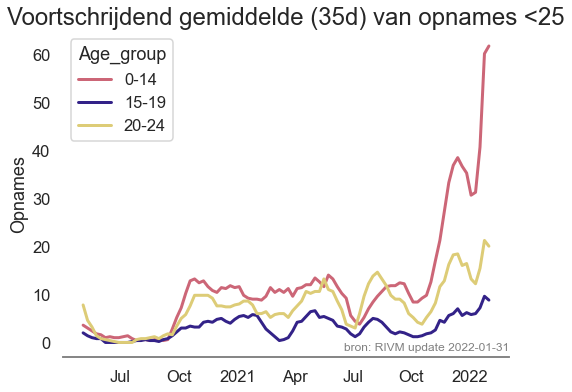

In [102]:
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = sns.lineplot(data=opnames2[opnames2.Age_group.isin(["0-14", "15-19", "20-24"])], x="Date_of_statistics_week_start", y="Hospital_admission_notification_7d", hue="Age_group")
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_xlabel('')
ax.set_ylabel('Opnames')
ax.set_title('Voortschrijdend gemiddelde (35d) van opnames <25', pad=30)
plt.title("bron: RIVM update " + opnames2.Date_of_statistics_week_start.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=0.0)
tuftefy(ax)

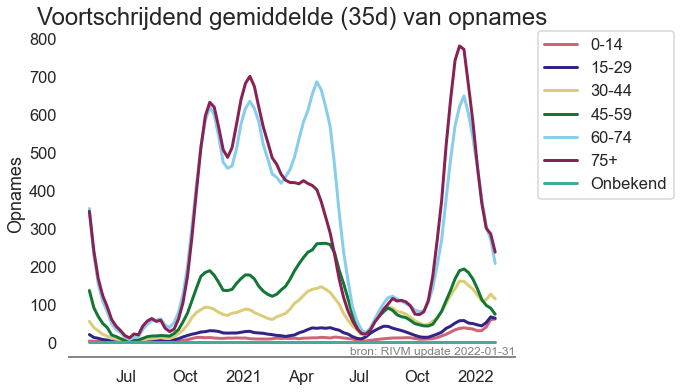

In [103]:
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = sns.lineplot(data=merged_opnames, x="Date_of_statistics_week_start", y="Hospital_admission_notification_7d", hue="Group")
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_xlabel('')
ax.set_ylabel('Opnames')
ax.set_title('Voortschrijdend gemiddelde (35d) van opnames', pad=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("bron: RIVM update " + opnames2.Date_of_statistics_week_start.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=-0.01)
tuftefy(ax)

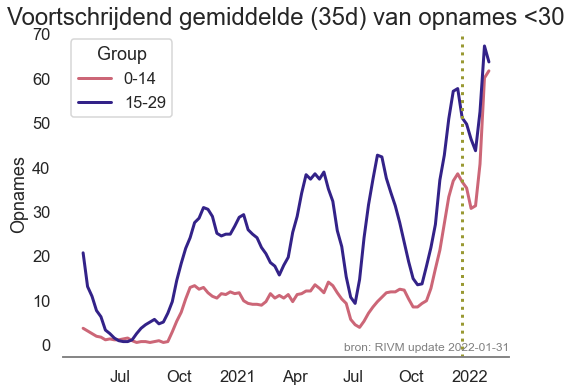

In [104]:
fig = plt.figure()
fig.set_size_inches(8, 6)

ax = sns.lineplot(data=merged_opnames[merged_opnames.Group.isin(["0-14", "15-29"])], x="Date_of_statistics_week_start", y="Hospital_admission_notification_7d", hue="Group")
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_xlabel('')
ax.set_ylabel('Opnames')
ax.set_title('Voortschrijdend gemiddelde (35d) van opnames <30', pad=30)
plt.axvline(date(2021,12,20), ls=":", c="#999933")
#plt.axvline(date(2021,2,8), ls=":", c="#aa4499")
plt.title("bron: RIVM update " + merged_opnames.Date_of_statistics_week_start.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=-0.00)
tuftefy(ax)

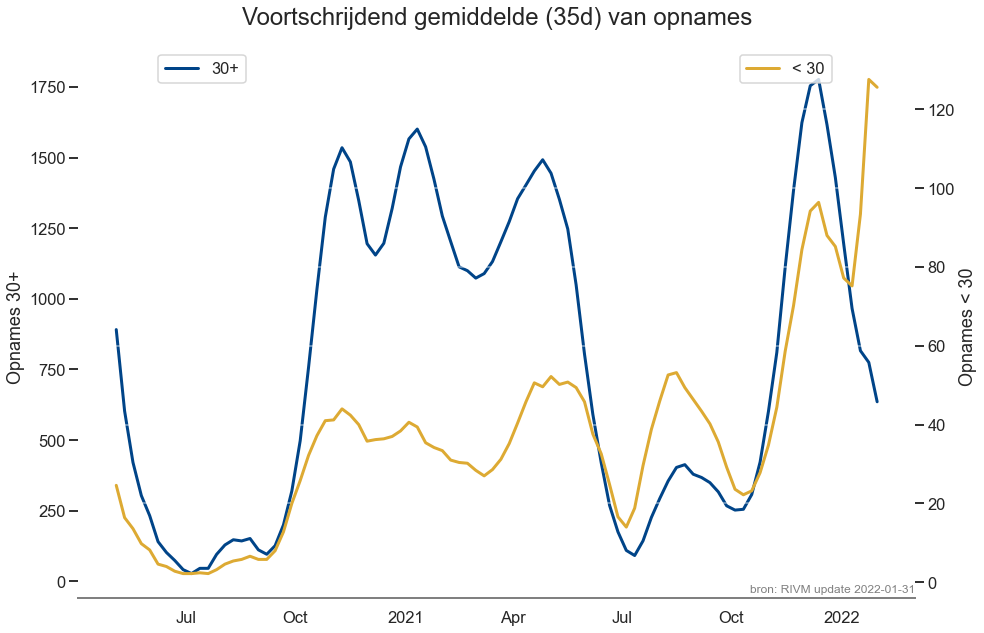

In [105]:
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = sns.lineplot(data=merged_opnames2[merged_opnames2.Group=="30+"], color='#004488', x="Date_of_statistics_week_start", y="Hospital_admission_notification_7d", label="30+")
plt.legend(bbox_to_anchor=(0.2, 1),borderaxespad=0)
ax2 = ax.twinx()
sns.lineplot(data=merged_opnames2[merged_opnames2.Group=="<30"], color='#ddaa33', x="Date_of_statistics_week_start", y="Hospital_admission_notification_7d", label="< 30", ax=ax2)
plt.legend(bbox_to_anchor=(0.9, 1),borderaxespad=0)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_xlabel('')
ax.set_ylabel('Opnames 30+')
ax2.set_ylabel('Opnames < 30')
ax.set_title('Voortschrijdend gemiddelde (35d) van opnames', pad=30)
plt.title("bron: RIVM update " + merged_opnames2.Date_of_statistics_week_start.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=-0.00)
tuftefy(ax)
tuftefy(ax2)


## Plots NICE data

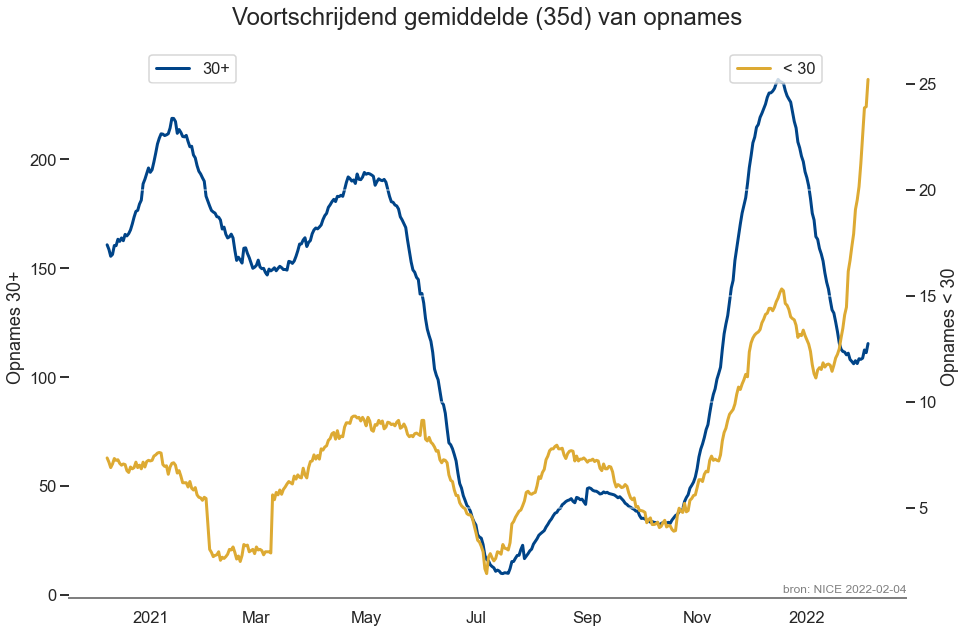

In [106]:

fig = plt.figure()
fig.set_size_inches(15, 10)
ax = sns.lineplot(data=opnames_nice, color='#004488', x="Datum", y="30+", label="30+")
plt.legend(bbox_to_anchor=(0.2, 1),borderaxespad=0)
ax2 = ax.twinx()
sns.lineplot(data=opnames_nice, color='#ddaa33', x="Datum", y="<30", label="< 30", ax=ax2)
plt.legend(bbox_to_anchor=(0.9, 1),borderaxespad=0)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_xlabel('')
ax.set_ylabel('Opnames 30+')
ax2.set_ylabel('Opnames < 30')
ax.set_title('Voortschrijdend gemiddelde (35d) van opnames', pad=30)
plt.title("bron: NICE " + opnames_nice.Datum.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=-0.00)
tuftefy(ax)
tuftefy(ax2)

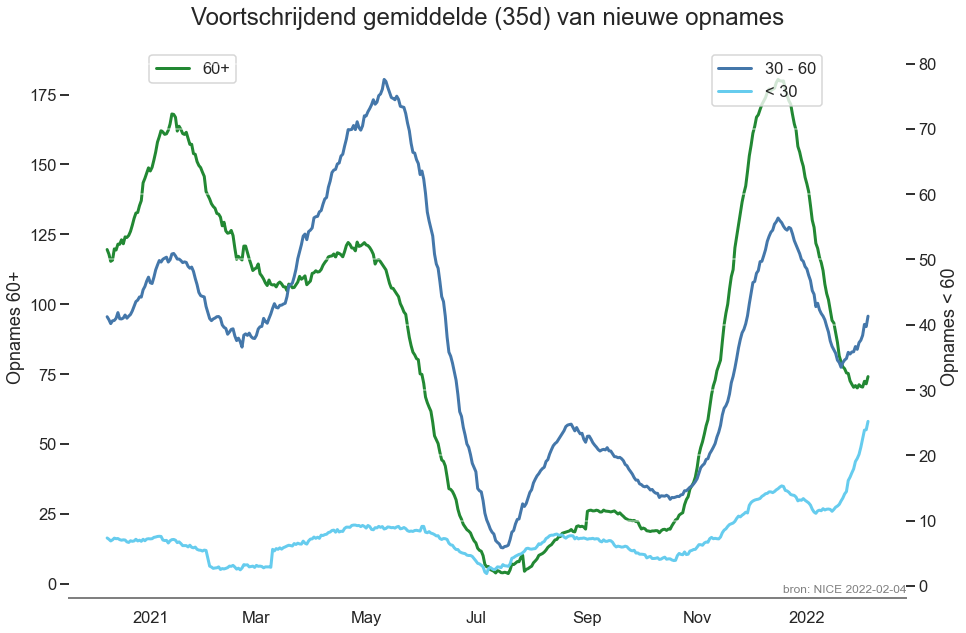

In [107]:

fig = plt.figure()
fig.set_size_inches(15, 10)
ax = sns.lineplot(data=opnames_nice, color='#228833', x="Datum", y="60+", label="60+")
plt.legend(bbox_to_anchor=(0.2, 1),borderaxespad=0)
ax2 = ax.twinx()
sns.lineplot(data=opnames_nice, color='#4477AA', x="Datum", y="30 - 60", label="30 - 60", ax = ax2)
sns.lineplot(data=opnames_nice, color='#66CCEE', x="Datum", y="<30", label="< 30", ax=ax2)
plt.legend(bbox_to_anchor=(0.9, 1),borderaxespad=0)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_xlabel('')
ax.set_ylabel('Opnames 60+')
ax2.set_ylabel('Opnames < 60')
ax.set_title('Voortschrijdend gemiddelde (35d) van nieuwe opnames', pad=30)
plt.title("bron: NICE " + opnames_nice.Datum.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=-0.00)
tuftefy(ax)
tuftefy(ax2)

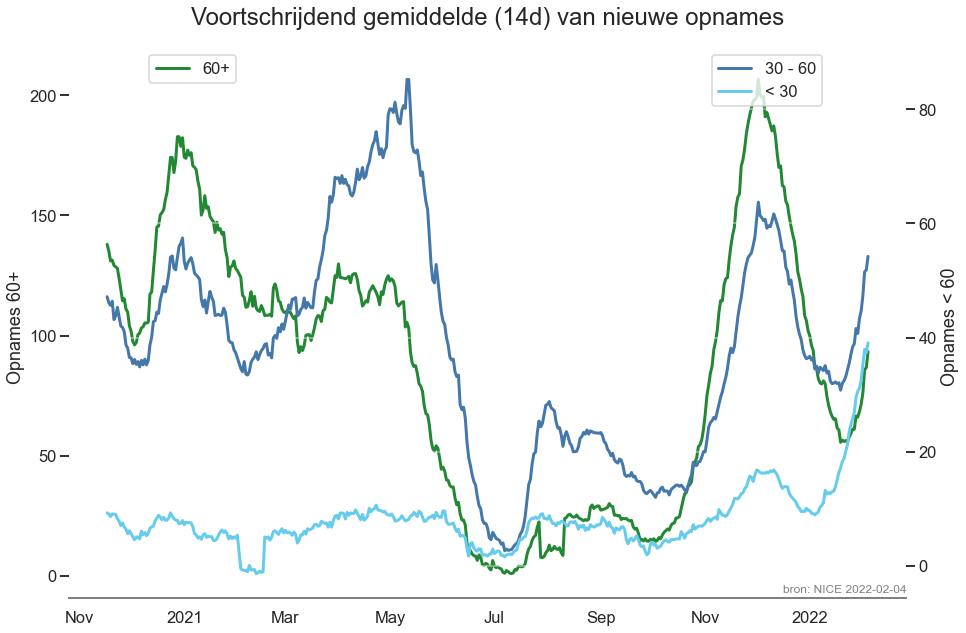

In [108]:

fig = plt.figure()
fig.set_size_inches(15, 10)
ax = sns.lineplot(data=opnames_nice7, color='#228833', x="Datum", y="60+", label="60+")
plt.legend(bbox_to_anchor=(0.2, 1),borderaxespad=0)
ax2 = ax.twinx()
sns.lineplot(data=opnames_nice7, color='#4477AA', x="Datum", y="30 - 60", label="30 - 60", ax = ax2)
sns.lineplot(data=opnames_nice7, color='#66CCEE', x="Datum", y="<30", label="< 30", ax=ax2)
plt.legend(bbox_to_anchor=(0.9, 1),borderaxespad=0)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_xlabel('')
ax.set_ylabel('Opnames 60+')
ax2.set_ylabel('Opnames < 60')
ax.set_title('Voortschrijdend gemiddelde (14d) van nieuwe opnames', pad=30)
plt.title("bron: NICE " + opnames_nice.Datum.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=-0.00)
tuftefy(ax)
tuftefy(ax2)

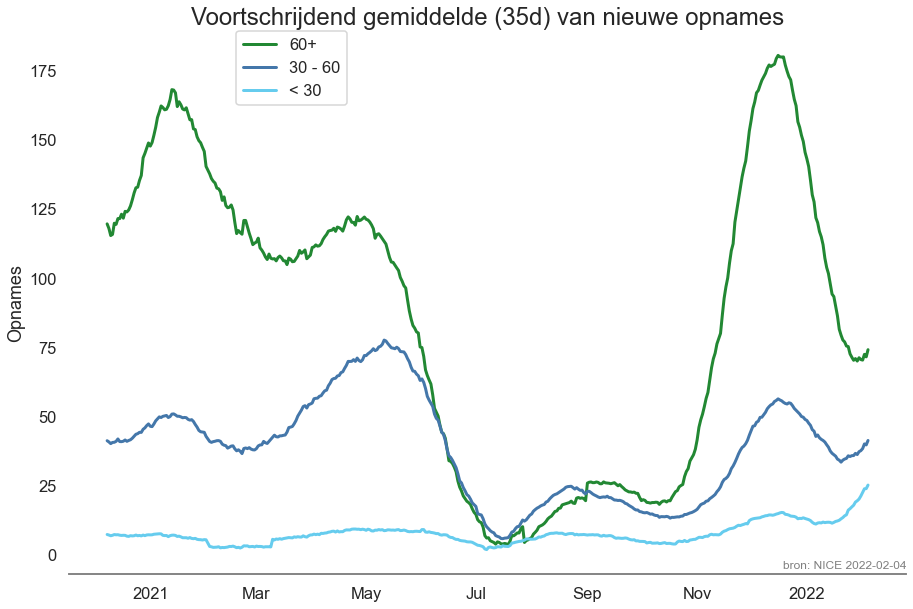

In [109]:
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = sns.lineplot(data=opnames_nice, color='#228833', x="Datum", y="60+", label="60+")
sns.lineplot(data=opnames_nice, color='#4477AA', x="Datum", y="30 - 60", label="30 - 60")
sns.lineplot(data=opnames_nice, color='#66CCEE', x="Datum", y="<30", label="< 30")
plt.legend(bbox_to_anchor=(0.2, 1),borderaxespad=0)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_title('Voortschrijdend gemiddelde (35d) van nieuwe opnames', pad=30)
ax.set_xlabel('')
ax.set_ylabel('Opnames')
plt.title("bron: NICE " + opnames_nice.Datum.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=-0.00)
tuftefy(ax)

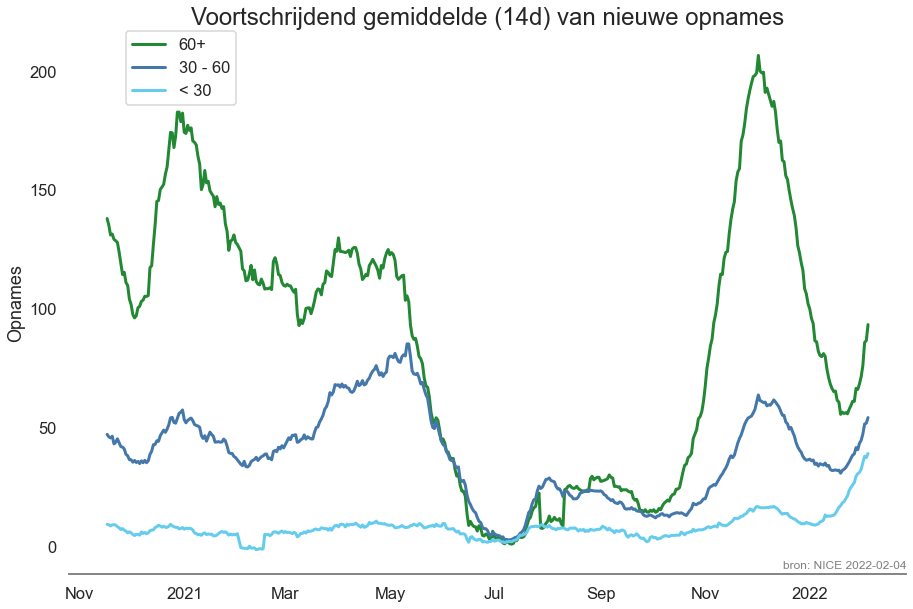

In [110]:
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = sns.lineplot(data=opnames_nice7, color='#228833', x="Datum", y="60+", label="60+")
sns.lineplot(data=opnames_nice7, color='#4477AA', x="Datum", y="30 - 60", label="30 - 60")
sns.lineplot(data=opnames_nice7, color='#66CCEE', x="Datum", y="<30", label="< 30")
plt.legend(bbox_to_anchor=(0.2, 1),borderaxespad=0)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_title('Voortschrijdend gemiddelde (14d) van nieuwe opnames', pad=30)
ax.set_xlabel('')
ax.set_ylabel('Opnames')
plt.title("bron: NICE " + opnames_nice.Datum.max().strftime('%Y-%m-%d'), loc='right', fontsize=12, color='grey', y=-0.00)
tuftefy(ax)

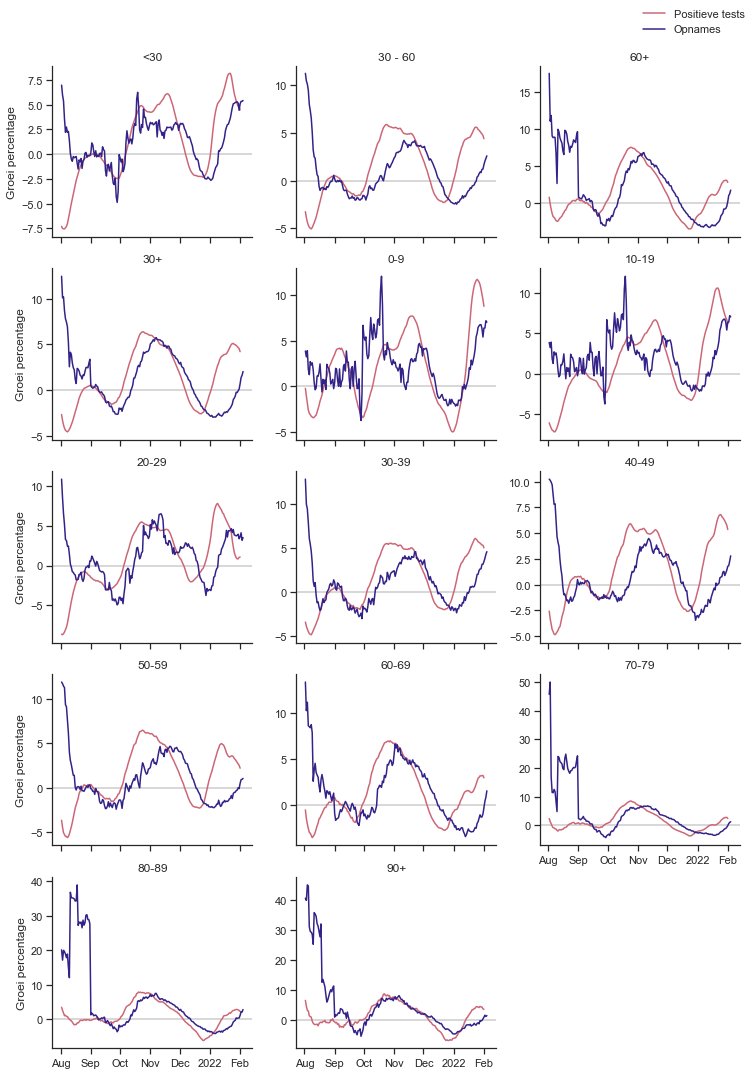

In [111]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 3, "font.size":8,"axes.titlesize":24,"axes.labelsize":18})
sns.set_style("whitegrid")
sns.set_theme(style="ticks")
#sns.set_palette(sns.color_palette("colorblind"))
sns.set_palette(sns.color_palette(['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', \
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD', \
                    '#000000']))
                    
g = sns.FacetGrid(data=opnames_cases_joined[opnames_cases_joined.Date> '2021-08-01'], col="Age_group", col_wrap=3, margin_titles=True, legend_out=True, sharey=False)
g.map_dataframe(sns.lineplot, x='Date', y='PositieveTestGrowth', color='#CC6677', label='Positieve tests')
g = g.map(plt.axhline, y=0.0, ls="-", c=".8", zorder=1)
g.map_dataframe(sns.lineplot, x='Date',y='OpnameGrowth', color='#332288', label='Opnames')
g.set_axis_labels("", "Groei percentage")

for ax in g.axes:
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%V'))
  #ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
  ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

g.set_titles(col_template = '{col_name}')
g.add_legend(loc='upper right')

g.despine()
plt.tight_layout()
plt.subplots_adjust(top=0.94)

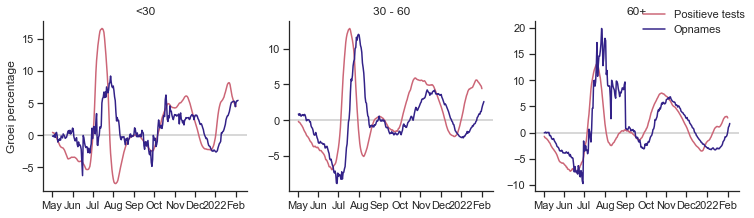

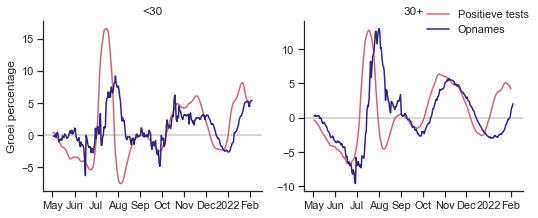

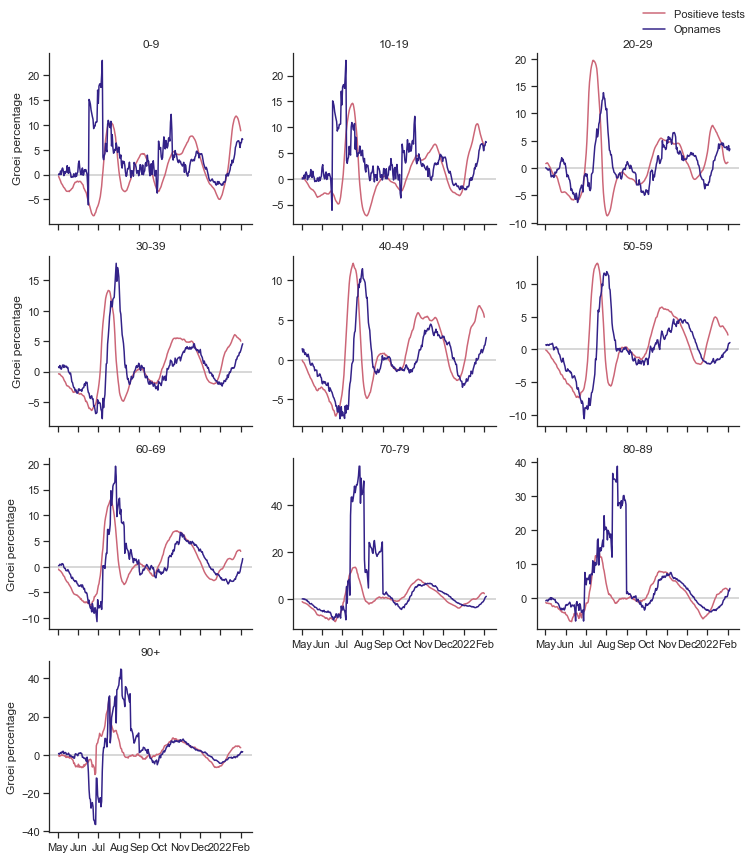

In [113]:
def facet_age(groups):
    g = sns.FacetGrid(data=opnames_cases_joined[(opnames_cases_joined.Date> '2021-05-01') & opnames_cases_joined.Age_group.isin(groups)], col="Age_group", col_wrap=min(3, len(groups)), margin_titles=True, legend_out=True, sharey=False)
    g.map_dataframe(sns.lineplot, x='Date', y='PositieveTestGrowth', color='#CC6677', label='Positieve tests')
    g = g.map(plt.axhline, y=0.0, ls="-", c=".8", zorder=1)
    g.map_dataframe(sns.lineplot, x='Date',y='OpnameGrowth', color='#332288', label='Opnames')
    g.set_axis_labels("", "Groei percentage")

    for ax in g.axes:
        #ax.xaxis.set_major_formatter(mdates.DateFormatter('%V'))
        #ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
        ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

    g.set_titles(col_template = '{col_name}')
    g.add_legend(loc='upper right')

    g.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)
    plt.show()
    plt.close()


facet_age(["<30", "30 - 60", "60+"])
facet_age(["<30", "30+"])
facet_age(["0-9", "10-19", '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+'])

    